# Homework3_3

Выполнил: Касенов Султан

В данной работе мы кластеризуем пользователей банка используя KNN алгоритм. Для начала импортируем все нужные библиотеки.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.datasets
from sklearn.model_selection import train_test_split
import sklearn.compose

Скачаем наш датасет.

In [ ]:
df = pd.read_csv('file_name.csv')


Данный датасет уже использовался в предыдущей лабораторной работе. Поэтому он уже готов к использованию и не требует предобработки (однако несколько ненужных колон следует убрать). 

In [ ]:
df = df.drop(['CLIENTNUM', 'Attrition_Flag', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Trans_Amt'], axis=1)

df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn,log_Credit_Limit,log_Avg_Open_To_Buy,log_Total_Trans_Amt
0,45,0,3,High School,Married,$60K - $80K,Blue,39,5,1,3,777,1.335,42,1.625,0.061,0,9.448648,9.385469,7.042286
1,49,1,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,864,1.541,33,3.714,0.105,0,9.018695,8.908154,7.163172
2,51,0,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,0,2.594,20,2.333,0.000,0,8.136811,8.136811,7.542744
3,40,1,4,High School,Married,Less than $40K,Blue,34,3,4,1,2517,1.405,20,2.333,0.760,0,8.105609,6.679599,7.065613
4,40,0,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,0,2.175,28,2.500,0.000,0,8.458716,8.458716,6.704414


Выделим категориальные/численные признаки и сохраним их в два списка.

In [ ]:
categorial = [x for x,d in df.dtypes.items() if d == 'object']
numerical = [x for x,d in df.dtypes.items() if (d == 'int' or d == 'float')]

print(numerical)
print(categorial)

['Customer_Age', 'Gender', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Churn', 'log_Credit_Limit', 'log_Avg_Open_To_Buy', 'log_Total_Trans_Amt']
['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


Встроим нормализацию в наш конвейер предобработки. Данный шаг скопирован с прошлой лабораторной работы.

In [ ]:
transformer = sk.compose.make_column_transformer(
    (sk.preprocessing.StandardScaler(), ['Customer_Age', 'Months_on_book', 'Total_Trans_Ct']),
    (sk.preprocessing.MinMaxScaler(), ['Total_Revolving_Bal']),
    (sk.preprocessing.OrdinalEncoder(categories=[['Married','Divorced','Single']]),['Marital_Status']),
    (sk.preprocessing.OrdinalEncoder(categories=[['$60K - $80K', '$40K - $60K', '$80K - $120K' , 'Less than $40K', '$120K +']]),['Income_Category']),
    (sk.preprocessing.OrdinalEncoder(categories=[['Silver', 'Blue', 'Gold' , 'Platinum']]),['Card_Category']),
    (sk.preprocessing.OneHotEncoder(), ['Education_Level']),
    remainder='passthrough'
)

X = transformer.fit_transform(df[numerical+categorial])
#X_trans_test = transformer.fit_transform([numerical+categorial])

Используем Elbow и Silhouette Method для нахождения оптимального числа кластеров. В нашем случае оптимальное число равно двум или трем. 

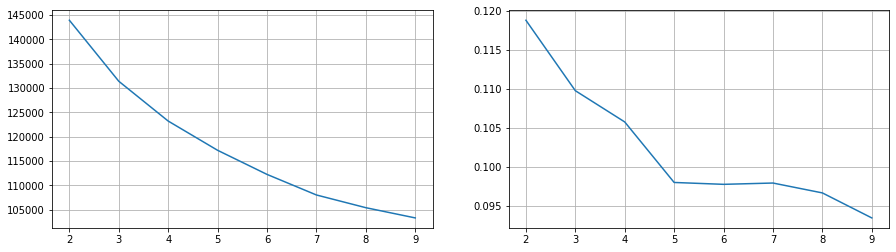

In [ ]:
import sklearn.cluster

inertias = []
scores = []
for k in range(2,10):
    km = sk.cluster.KMeans(n_clusters=k).fit(X)
    s = sk.metrics.silhouette_score(X,km.labels_)
    inertias.append(km.inertia_)
    scores.append(s)

fig,ax = plt.subplots(1,2,figsize=(15,4))
ax[0].plot(range(2,10),inertias)
ax[0].grid()
ax[1].plot(range(2,10),scores)
ax[1].grid()

Теперь используем встроенный метод KNN алгоритма в библиотеку Sklearn и найдем соответствующие классы каждому пользователю. 

In [ ]:
nclusters = 3
km = sk.cluster.KMeans(n_clusters=nclusters).fit(X)
km.labels_

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

Просто рассмотрев центроиды мы не получим никакой информации так как мы применяли различные методы нормализации

In [ ]:
km.cluster_centers_

array([[ 1.16047877e-02, -8.54249022e-04, -1.84092263e-01,
         4.79303795e-01,  8.04912612e-01,  2.37387813e+00,
         1.00000000e+00,  1.00377893e-01,  4.36939065e-02,
         4.63155409e-01,  1.95087388e-01,  5.19603212e-02,
         1.45725083e-01,  7.35002362e-01,  2.18989136e+00,
         4.35640057e+00,  2.38828531e+00,  2.45630609e+00,
         7.63474256e-01,  7.10009920e-01,  4.52570855e-01,
         1.63438829e-01,  7.81719579e+00,  7.02862315e+00,
         8.01873076e+00],
       [-1.80413455e-02, -5.20309864e-03,  7.73316476e-01,
         4.63069035e-01,  9.08190476e-01,  2.14057143e+00,
         9.49714286e-01,  1.08190476e-01,  4.30476190e-02,
         4.60952381e-01,  1.95047619e-01,  4.83809524e-02,
         1.44380952e-01,  5.08190476e-01,  2.52838095e+00,
         1.94476190e+00,  2.29714286e+00,  2.21333333e+00,
         7.46670476e-01,  7.12905143e-01,  2.03124190e-01,
         1.72190476e-01,  8.86835451e+00,  8.58743409e+00,
         8.73792779e+00],
    

Чтобы лучше рассмотреть полученные группы добавим номера классов в нашу таблицу.

In [ ]:
df['cluster'] = km.labels_
df

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn,log_Credit_Limit,log_Avg_Open_To_Buy,log_Total_Trans_Amt,cluster
0,45,0,3,High School,Married,$60K - $80K,Blue,39,5,1,...,777,1.335,42,1.625,0.061,0,9.448648,9.385469,7.042286,2
1,49,1,5,Graduate,Single,Less than $40K,Blue,44,6,1,...,864,1.541,33,3.714,0.105,0,9.018695,8.908154,7.163172,2
2,51,0,3,Graduate,Married,$80K - $120K,Blue,36,4,1,...,0,2.594,20,2.333,0.000,0,8.136811,8.136811,7.542744,0
3,40,1,4,High School,Married,Less than $40K,Blue,34,3,4,...,2517,1.405,20,2.333,0.760,0,8.105609,6.679599,7.065613,0
4,40,0,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,...,0,2.175,28,2.500,0.000,0,8.458716,8.458716,6.704414,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,0,2,Graduate,Single,$40K - $60K,Blue,40,3,2,...,1851,0.703,117,0.857,0.462,0,8.294799,7.674153,9.647046,1
10123,41,0,2,Graduate,Divorced,$40K - $60K,Blue,25,4,2,...,2186,0.804,69,0.683,0.511,1,8.361007,7.645398,9.078408,0
10124,44,1,1,High School,Married,Less than $40K,Blue,36,5,3,...,0,0.819,60,0.818,0.000,1,8.595820,8.595820,9.239025,2
10125,30,0,2,Graduate,Married,$40K - $60K,Blue,36,4,3,...,0,0.535,62,0.722,0.000,1,8.571871,8.571871,9.035392,2


Теперь можно рассмотреть средние значения для каждого класса в нашем датасете. Например возраст для всех классов примерно одинаковый, но вот женщин во втором классе больше (среднее значение ближе к 0), когда в нулевом больше мужчин (среднее ближе к 1). По такому принципу можно рассмотреть каждую колонну. 

In [ ]:
d = { x : 'mean' for x in numerical}

res = df.groupby('cluster').agg(d)
res

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,log_Credit_Limit,log_Avg_Open_To_Buy,log_Total_Trans_Amt
cluster,,,,,,,,,,,,,,,
0,46.418989,0.735002,2.189891,35.921587,4.356401,2.388285,2.456306,1206.407652,0.763474,60.537789,0.710010,0.452571,7.817196,7.028623,8.018731
1,46.181333,0.508190,2.528381,35.886857,1.944762,2.297143,2.213333,1165.544762,0.746670,83.009524,0.712905,0.203124,8.868355,8.587434,8.737928
2,46.321603,0.279070,2.402387,35.970624,4.608323,2.315483,2.648409,1104.141065,0.766022,55.877295,0.714540,0.102344,9.409216,9.294347,7.893734


Теперь визуализируем полученный результат на двухмерном пространстве с помощью PCA алгоритма понижения размерности. Видно, что наши классы очень равномерно разделилсиь и  поэтому можно сделать вывод что количество классов выбрано оптимально.  

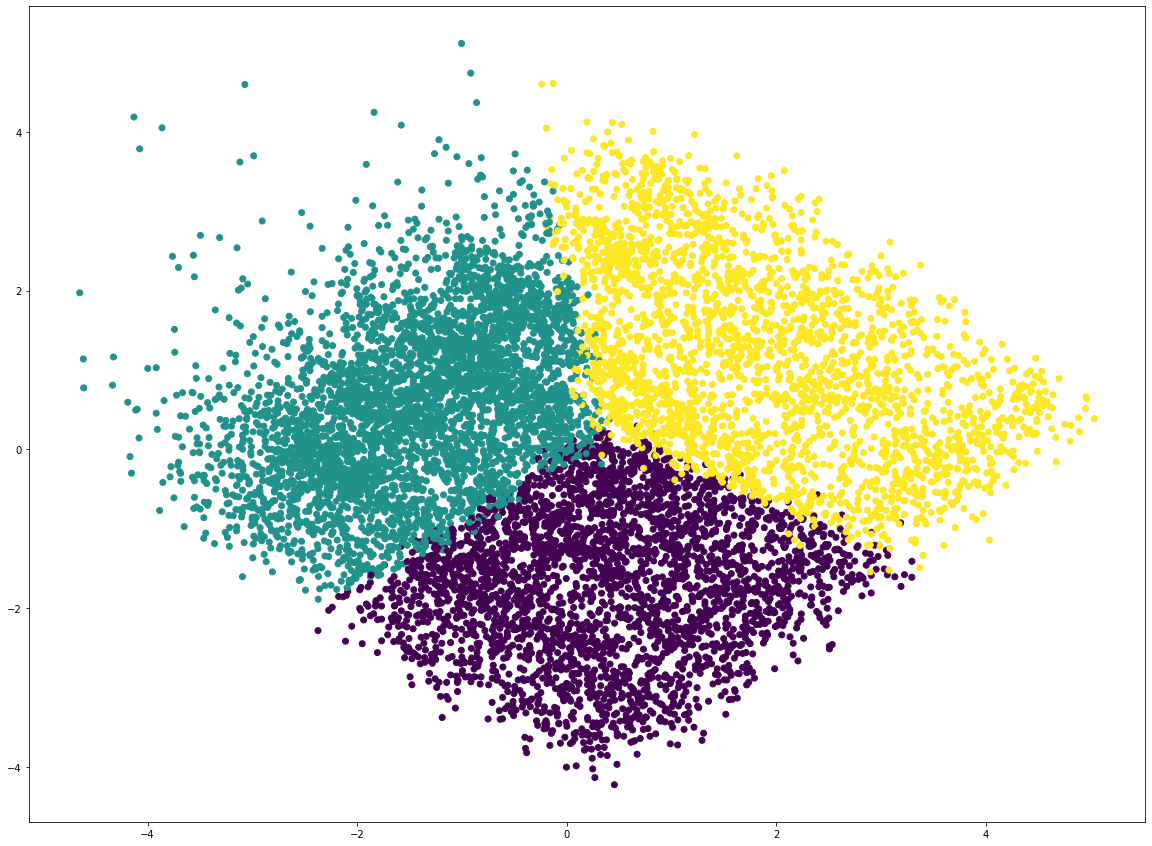

In [ ]:
from sklearn.decomposition import TruncatedSVD


Y=km.labels_

res = sk.decomposition.PCA(n_components=2).fit_transform(X)
plt.figure(figsize=(20,15))
plt.scatter(res[:,0],res[:,1], c=Y)
plt.show()

Далее были рассмотрены еще несколько методов понижения размерности. 

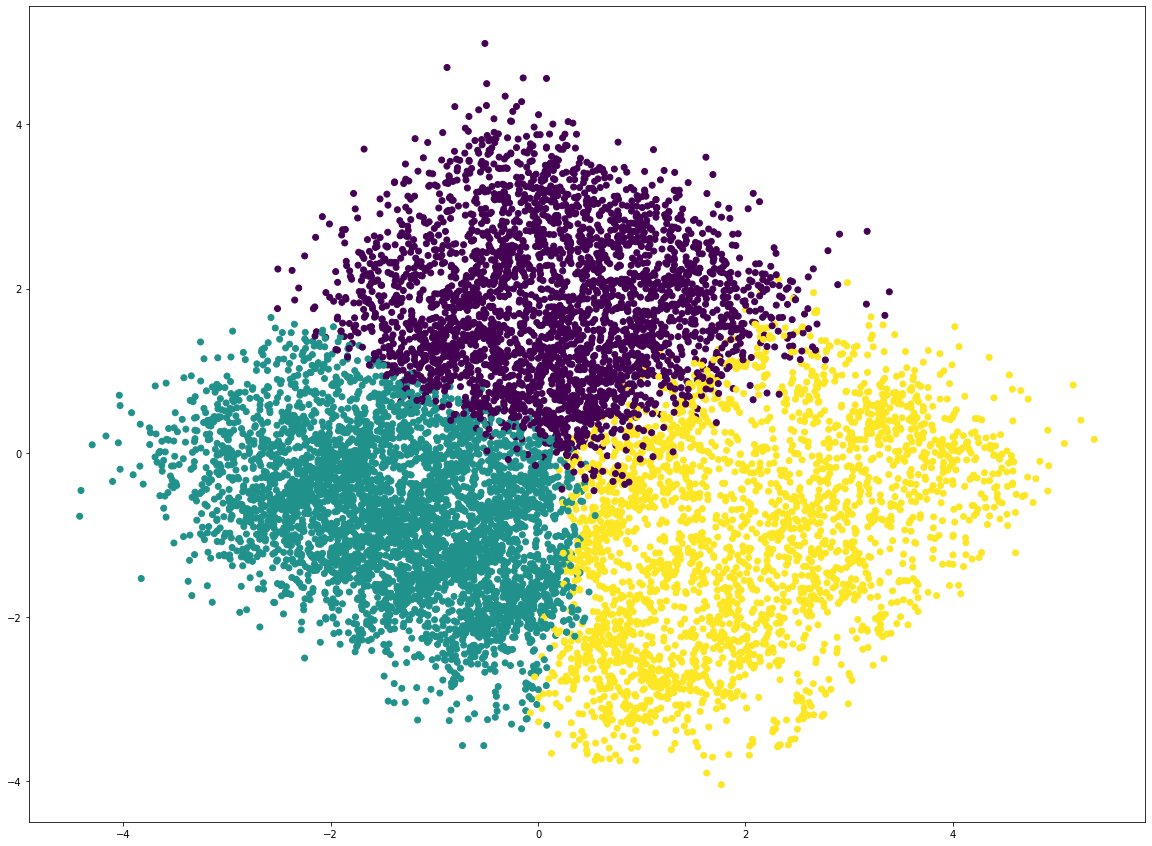

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import Isomap
from sklearn.decomposition import TruncatedSVD

Y=km.labels_

res = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, Y)
plt.figure(figsize=(20,15))
plt.scatter(res[:,0],res[:,1], c=Y)
plt.show()

# Доп задание

Проверим поможет ли понижение размерности улучшить качество классификации для данного датасета. Для этого разделим датасет на тренировочную и тестовую части. 

In [ ]:
import sklearn.tree 

X = df[numerical+categorial]
Y = df['Churn']
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X,Y,test_size=0.2)


In [ ]:
numerical.remove('Churn')

Применим предобработку

In [ ]:
X = transformer.fit_transform(X_train[numerical+categorial])
X_test = transformer.transform(X_test[numerical+categorial])

Далее можно увидеть полученную точность. 

In [ ]:
model = sk.tree.DecisionTreeClassifier().fit(X,Y_train)
Y_pred = model.predict(X_test)
sk.metrics.accuracy_score(Y_test,Y_pred)

0.9378084896347483

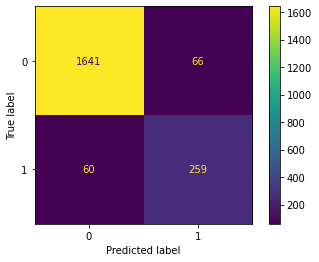

In [ ]:
sk.metrics.ConfusionMatrixDisplay.from_estimator(model,X_test,Y_test)
plt.show()

Теперь применим понижение размерности и обучив заново модель, сравним наши результаты. Данный подход ухудшил точность модели. Причина пока неизвестна...

In [ ]:
res_X = sk.decomposition.PCA(n_components=3).fit_transform(X)
res_X_test = sk.decomposition.PCA(n_components=3).fit_transform(X_test)

In [ ]:
model = sk.tree.DecisionTreeClassifier().fit(res_X,Y_train)
Y_pred = model.predict(res_X_test)
sk.metrics.accuracy_score(Y_test,Y_pred)

0.7561697926949654

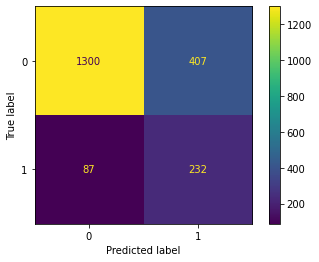

In [ ]:
sk.metrics.ConfusionMatrixDisplay.from_estimator(model,res_X_test,Y_test)
plt.show()